In [19]:
import numpy as np
import matplotlib.pyplot as plt


In [123]:
name = "1d_m_6"
folder = "./" + name + "/"

field_data_y = np.genfromtxt(folder + "Ey.txt")
field_data_z = np.genfromtxt(folder + "Ez.txt")


In [124]:
field_data_y.shape

(32641, 2)

In [125]:
plt.figure(figsize=(15,10))
plt.imshow(field_data_y, aspect='auto')
plt.colorbar()

32641


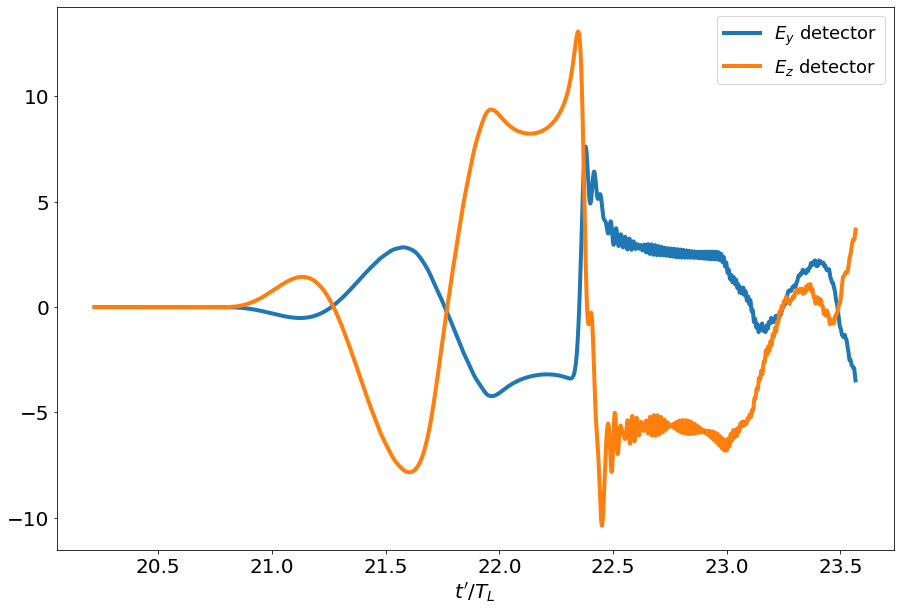

In [126]:
t = np.linspace(0, 30, field_data_y.shape[0])
print(field_data_y.shape[0])
index = 22000
en = -7000

plt.figure(figsize=(15,10))

plt.plot(t[index:en], field_data_y[index:en, 0], lw=4, label = "$E_y$ detector")
plt.plot(t[index:en], field_data_z[index:en, 0], lw=4, label = "$E_z$ detector")

plt.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$t^\prime/T_L$', fontsize=20)
plt.savefig("1_d_detector_" + name + ".png")





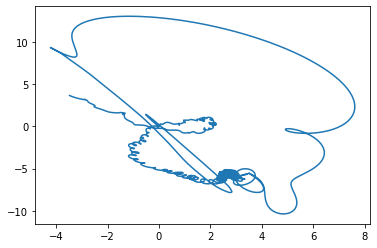

In [127]:
plt.plot(field_data_y[index:en, 0], field_data_z[index:en, 0])

(1820,)


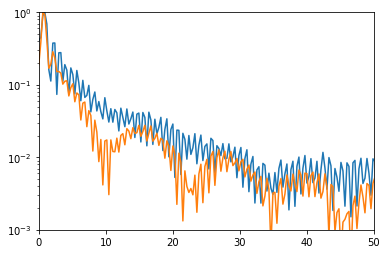

In [128]:
sp_y = np.fft.fft(field_data_y[index:en, 0])
sp_z = np.fft.fft(field_data_z[index:en, 0])

length = t[index:en].shape[-1]
w = np.fft.fftfreq(length, d = t[1]-t[0])

#plt.plot(w[:length//2], abs(sp_y[:length//2]))
#plt.yscale('log')
plt.semilogy(w, abs(sp_y)/np.amax(abs(sp_y)))
plt.semilogy(w, abs(sp_z)/np.amax(abs(sp_z)))
plt.xlim(0, 50)
plt.ylim(1e-3, 1)
#plt.plot(freq, sp.imag)
print(w[:length//2].shape)

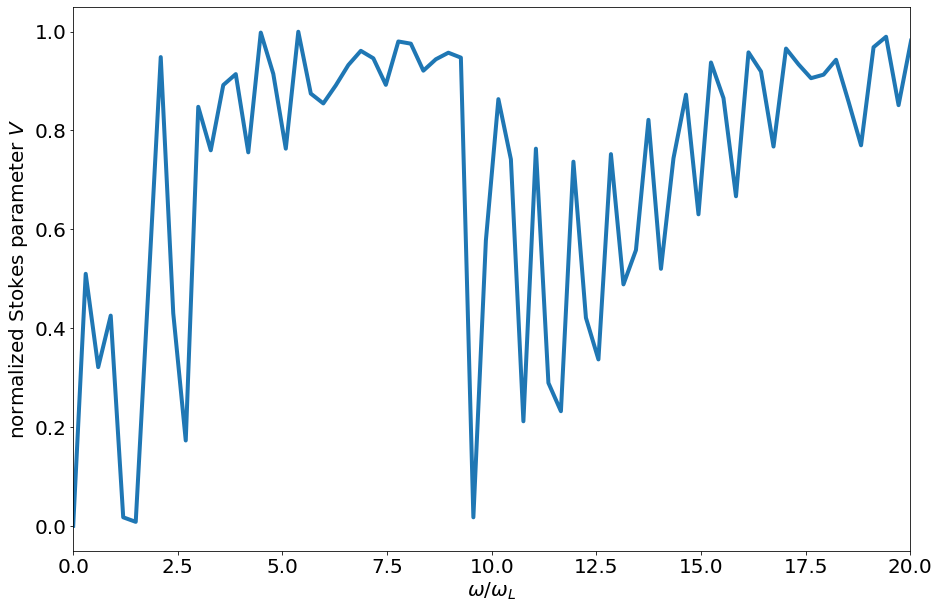

In [129]:
angle_diff = abs(np.sin(np.angle(sp_y)-np.angle(sp_z)))


plt.figure(figsize=(15,10))
plt.plot(w[:length//2], angle_diff[:length//2], lw=4)
plt.xlim(0, 20)
#plt.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('normalized Stokes parameter $V$', fontsize=20)
plt.xlabel('$\omega / \omega _L$', fontsize=20)
plt.savefig("1d_ellipticity_" + name + ".png")

(1e-06, 1)

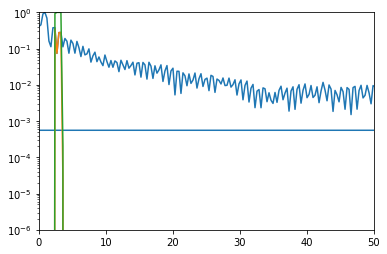

In [130]:
filter_center=2.9
filter_width=0.6
bandgap_filter_minus=np.exp(-(w-filter_center)**16/filter_width**16)
bandgap_filter_plus=np.exp(-(w+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
plt.semilogy(w, abs(sp_y)/np.amax(abs(sp_y)))
plt.semilogy(w, abs(bandgap_filter*sp_y)/np.amax(abs(sp_y)))
plt.semilogy(w, bandgap_filter)

sp_y_filt = bandgap_filter*sp_y
sp_z_filt = bandgap_filter*sp_z
plt.xlim(0,50)
plt.ylim(1e-6,1)

(0.0, 50.0)

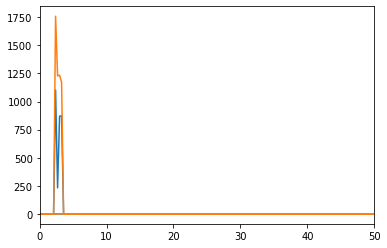

In [131]:
plt.plot(w, abs(sp_y_filt))
plt.plot(w, abs(sp_z_filt))
plt.xlim(0,50)

/home/rzagidullin/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/rzagidullin/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


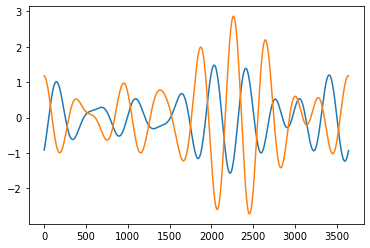

In [132]:
filtered_y=np.fft.ifft(sp_y_filt)
filtered_z=np.fft.ifft(sp_z_filt)

plt.plot(filtered_y)
plt.plot(filtered_z)

#plt.xlim(-1,1)
#plt.ylim(-1,1)

/home/rzagidullin/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


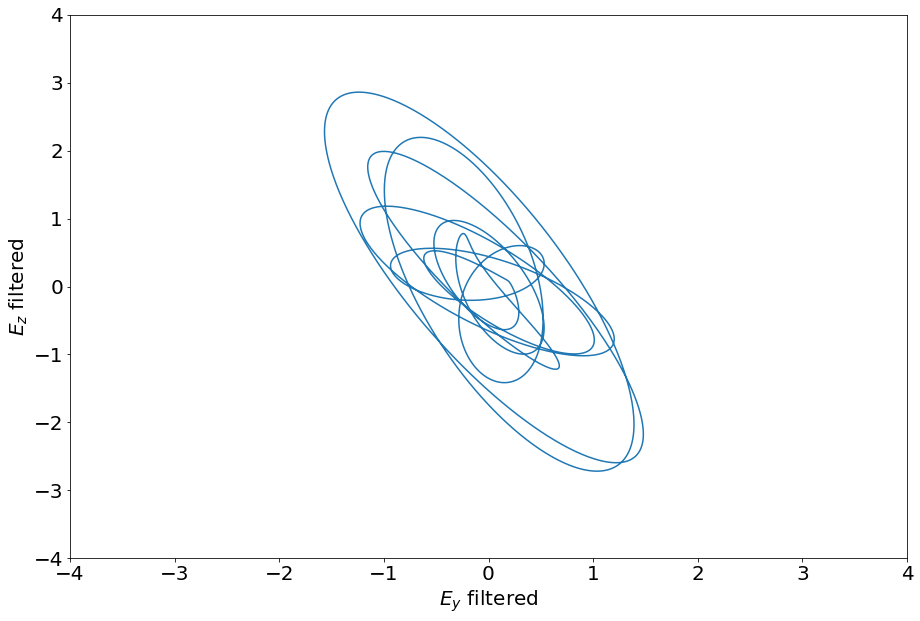

In [133]:
val = 4


plt.figure(figsize=(15,10))
plt.plot(filtered_y, filtered_z)
plt.xlim(-val, val)
plt.ylim(-val, val)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$E_y$ filtered', fontsize=20)
plt.ylabel('$E_z$ filtered', fontsize=20)
plt.savefig("1d_filtered_" + name + ".png")


(2,)


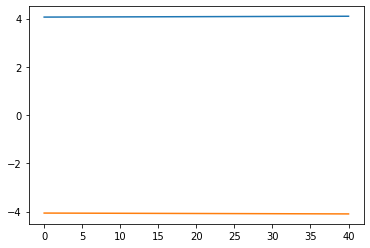

In [382]:
x = np.linspace(0, 40, field_data_y.shape[1])
print(x.shape)
plt.plot(x, field_data_y[5000])
plt.plot(x, field_data_z[5000])

In [13]:
#particle_data_x = np.genfromtxt("Px.txt")
#particle_data_y = np.genfromtxt("Py.txt")
#particle_data_z = np.genfromtxt("Pz.txt")

In [14]:
#plt.plot(particle_data_y[150:-520, 366])
#plt.plot(particle_data_z[150:-520, 366])

In [15]:
#plt.figure(figsize=(15,10))
#plt.imshow(particle_data_x[:, :].T, aspect='auto', vmax=0.3, vmin=-0.3, cmap='coolwarm')
#plt.colorbar()

In [16]:
#particle_data_x.shape

In [17]:
#print(np.argmax(particle_data_z)%particle_data_z.shape[1])
#print(np.argmax(particle_data_y)%particle_data_y.shape[1])
#print(np.argmax(particle_data_x)%particle_data_x.shape[1])

In [18]:
#plt.plot(particle_data_x[150:-520, np.argmax(particle_data_x)%particle_data_x.shape[1]], label = '$p_x$')
#plt.plot(particle_data_y[:, np.argmax(particle_data_y)%particle_data_y.shape[1]], label = '$p_y$')
#plt.plot(particle_data_z[:, np.argmax(particle_data_z)%particle_data_z.shape[1]], label = '$p_z$')
#plt.legend()

In [19]:
tracking_data_x = np.genfromtxt("Track_x.txt")
#tracking_data_w = np.genfromtxt("Track_w.txt")

In [20]:
tracking_data_px = np.genfromtxt("Track_px.txt")
tracking_data_py = np.genfromtxt("Track_py.txt")
tracking_data_pz = np.genfromtxt("Track_pz.txt")


Text(0.5, 0, '$t^\\prime/T_L$')

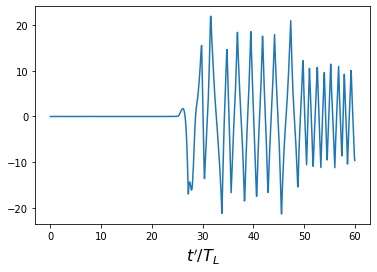

In [21]:
plt.plot(tracking_data_px[0]/1632, tracking_data_px[1])
plt.xlabel('$t^\prime/T_L$', fontsize=16)

Text(0.5, 0, '$t^\\prime/T_L$')

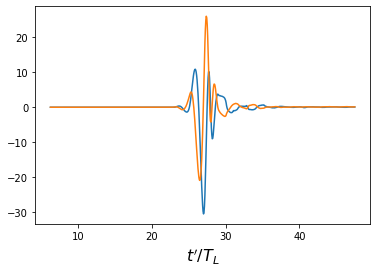

In [22]:
plt.plot(tracking_data_py[0][100:-200]/1632, tracking_data_py[1,100:-200])
plt.plot(tracking_data_pz[0][100:-200]/1632, tracking_data_pz[1,100:-200])
plt.xlabel('$t^\prime/T_L$', fontsize=16)

Text(0.5, 0, '$t^\\prime/T_L$')

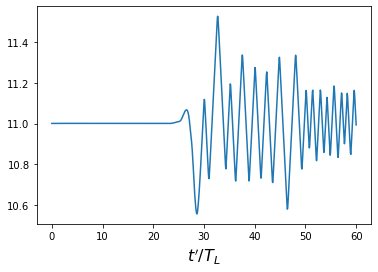

In [23]:
plt.plot(tracking_data_x[0]/1632, tracking_data_x[1]/2/np.pi)
plt.xlabel('$t^\prime/T_L$', fontsize=16)

In [24]:
density = np.genfromtxt("Weight.txt")

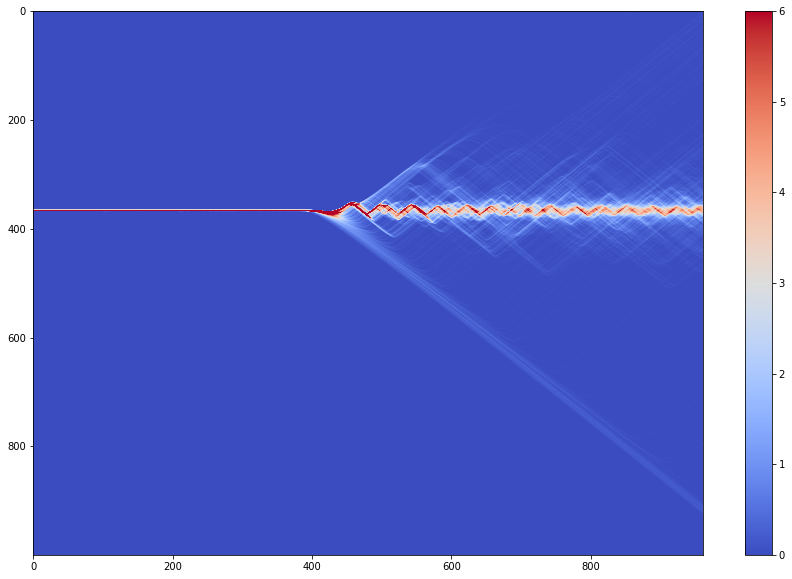

In [25]:
plt.figure(figsize=(15,10))
plt.imshow(density[:, :].T, aspect='auto', vmax=6., cmap='coolwarm')
plt.colorbar()

# 2D and 3D stuff


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [227]:
name = "final_m_1"
folder = "./" + name + "/"
#folder = "./final_p_1/"

field_data_x = np.genfromtxt(folder + "Ex_2d_0.txt")
field_data_y = np.genfromtxt(folder + "Ey_2d_0.txt")
field_data_z = np.genfromtxt(folder + "Ez_2d_0.txt")
#field_data_x = np.genfromtxt("Ex_2d_1.txt")
#field_data_y = np.genfromtxt("Ey_2d_1.txt")
#field_data_z = np.genfromtxt("Ez_2d_1.txt")

In [228]:
field_data_x.shape

(32501,)

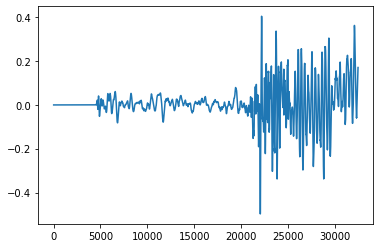

In [229]:
plt.plot(field_data_x)#[20000:20500])

In [230]:
plt.plot(field_data_y)#[6000:15000])#[2500:3000])
plt.plot(field_data_z)#[6000:15000])#[2500:3000])

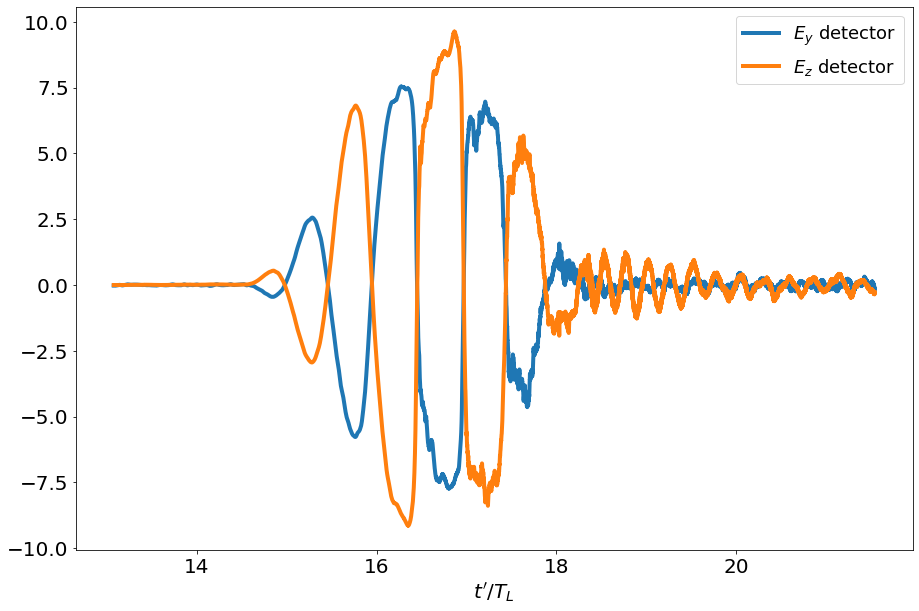

In [231]:
t = np.linspace(0, 25, field_data_y.shape[0])*field_data_y.shape[0]/32500.
ind=17000
ind2=28000

plt.figure(figsize=(15,10))
plt.plot(t[ind:ind2], field_data_y[ind:ind2], lw=4, label = "$E_y$ detector")#[2500:3000])
plt.plot(t[ind:ind2], field_data_z[ind:ind2], lw=4, label = "$E_z$ detector")#[2500:3000])
plt.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$t^\prime/T_L$', fontsize=20)
plt.savefig("detector_" + name + ".png")



In [232]:
plt.plot(field_data_y[8000:16000], field_data_z[8000:16000])

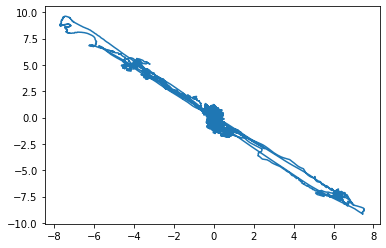

In [233]:
plt.plot(field_data_y[ind:ind2], field_data_z[ind:ind2])
#plt.plot(field_data_y[100:], field_data_z[100:])

In [234]:
t = np.linspace(0, 25, field_data_y.shape[0])*field_data_y.shape[0]/32500.
#ind1=7000#5000
#ind2=12500#12500#11500
ind1=ind#15000
ind2=ind2

sp_y = np.fft.fft(field_data_y[ind1:ind2])
sp_z = np.fft.fft(field_data_z[ind1:ind2])

length = t[ind1:ind2].shape[-1]
w = np.fft.fftfreq(length, d = t[1]-t[0])

#plt.plot(w[:length//2], abs(sp_y[:length//2]))
#plt.yscale('log')

plt.semilogy(w, abs(sp_y)/np.amax(abs(sp_y)))
plt.semilogy(w, abs(sp_z)/np.amax(abs(sp_z)))
plt.xlim(0, 30)
plt.ylim(1e-6, 1)
#plt.plot(freq, sp.imag)

(1e-06, 1)

In [235]:
angle_diff = abs(np.sin(np.angle(sp_y)-np.angle(sp_z)))


plt.figure(figsize=(15,10))
plt.plot(w[:length//2], angle_diff[:length//2], lw=4)
plt.xlim(0, 20)
#plt.legend(fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('normalized Stokes parameter $V$', fontsize=20)
plt.xlabel('$\omega / \omega _L$', fontsize=20)
plt.savefig("ellipticity_" + name + ".png")

(1e-09, 1)

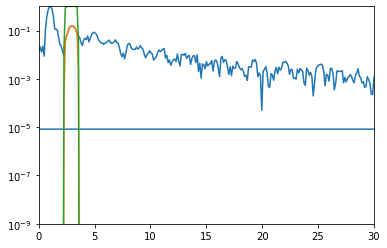

In [236]:
filter_center=2.9
filter_width=0.6
bandgap_filter_minus=np.exp(-(w-filter_center)**16/filter_width**16)
bandgap_filter_plus=np.exp(-(w+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
plt.semilogy(w, abs(sp_y)/np.amax(abs(sp_y)))
plt.semilogy(w, abs(bandgap_filter*sp_y)/np.amax(abs(sp_y)))
plt.semilogy(w, bandgap_filter)

sp_y_filt = bandgap_filter*sp_y
sp_z_filt = bandgap_filter*sp_z
plt.xlim(0,30)
plt.ylim(1e-9,1)

/home/rzagidullin/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


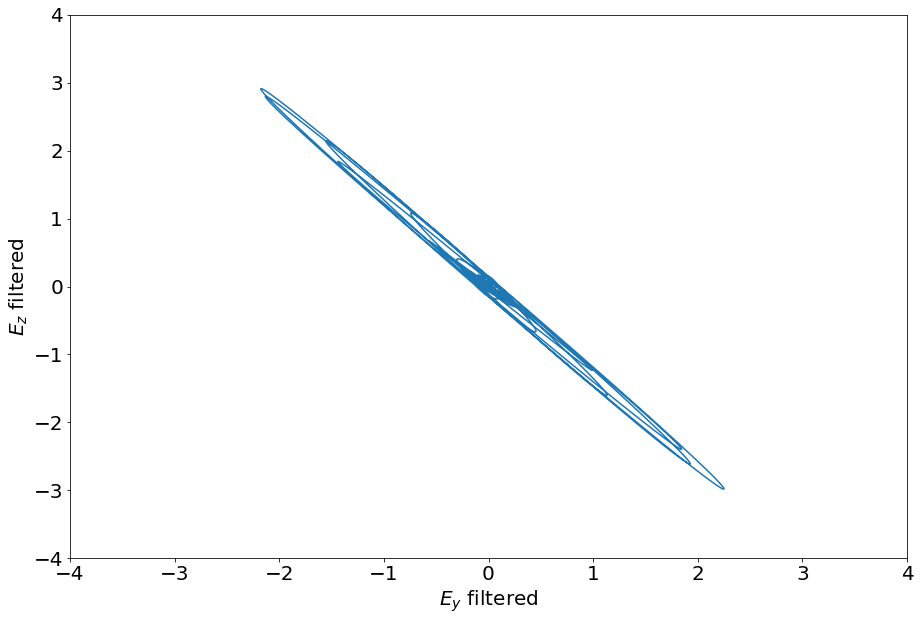

In [237]:
filtered_y=np.fft.ifft(sp_y_filt)
filtered_z=np.fft.ifft(sp_z_filt)

val = 4


plt.figure(figsize=(15,10))
plt.plot(filtered_y, filtered_z)
plt.xlim(-val, val)
plt.ylim(-val, val)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('$E_y$ filtered', fontsize=20)
plt.ylabel('$E_z$ filtered', fontsize=20)
plt.savefig("filtered_" + name + ".png")


/home/rzagidullin/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/rzagidullin/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


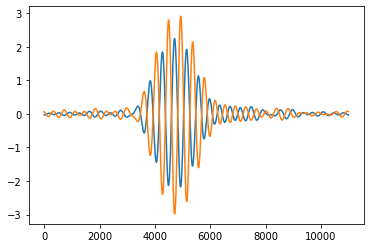

In [238]:
plt.plot(filtered_y)#[:1000])
plt.plot(filtered_z)#[:1000])

In [225]:
#tracking_data_x = np.genfromtxt("Track_2d_x.txt")

In [226]:
tracking_data_x.shape

(601, 48961)

In [ ]:
plt.plot(tracking_data_x[1])


In [ ]:
tracking_data_y = np.genfromtxt("Track_2d_y.txt")

In [ ]:
tracking_data_y.shape

In [ ]:
plt.plot(tracking_data_y[1])

In [ ]:
num = 100
plt.plot(tracking_data_x[num][:], tracking_data_y[num][:])

### Weight 2d

In [ ]:
weight_data = np.genfromtxt("Weight_2d.txt")

In [ ]:
res = weight_data.reshape(164, 200, 100)

In [ ]:
plt.imshow(res[0][95:-95,:], aspect='auto')
plt.colorbar()

In [ ]:
plt.imshow(res[1][95:-95,:], aspect='auto')
plt.colorbar()

In [ ]:
plt.imshow(res[90][95:-95,:], aspect='auto')
plt.colorbar()

In [ ]:
res[:, 95:-95, :].shape

In [ ]:
plt.imshow(res[:, 96:-96, 50].T, aspect='auto', vmax=6)
plt.colorbar()

# DSP STUFF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [510]:
fin = 10*np.pi
t = np.linspace(0, fin, 1000)
y = 20*np.sin(t)#*np.exp(-(t-fin/2)**2/5**2)
z = 20*np.sin(t-np.pi/2)
#y[500] = 0.0

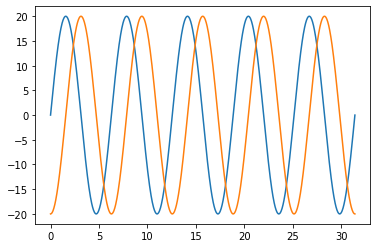

In [511]:
plt.plot(t, y)
plt.plot(t, z)

In [512]:
ang = np.angle(np.fft.fft(z)[16])-np.angle(np.fft.fft(y)[16])
print(ang)

-1.5707963267949467


0.03144737390980774
(499,)
17.236670517426994
16
17.236670517426994


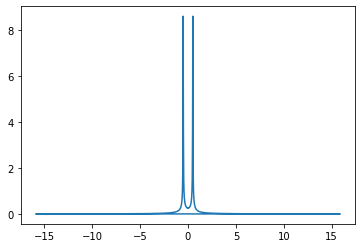

In [491]:
ind1=0
ind2=-1
sp_y = np.fft.fft(y[ind1:ind2])

length = t[ind1:ind2].shape[-1]
w = np.fft.fftfreq(length, d = t[1]-t[0])
print(t[1]-t[0])
#plt.plot(w[:length//2], abs(sp_y[:length//2]))
#plt.yscale('log')
plt.plot(w, abs(sp_y)/1000)#np.amax(abs(sp_y)))
#plt.xlim(1, 50)
#plt.ylim(1e-9, 1)
print(w[:length//2].shape)
print(max(abs(sp_y))/500)
print(np.argmax(abs(sp_y)))
print(abs(sp_y[16])/500)

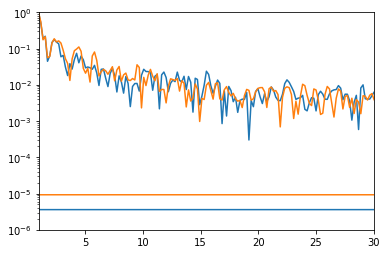

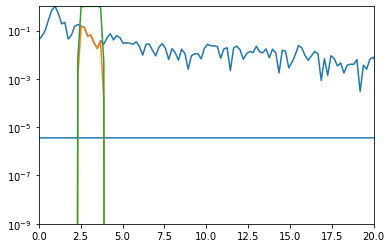

/home/rzagidullin/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


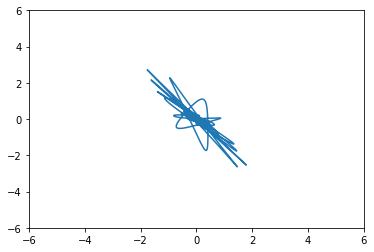

/home/rzagidullin/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/rzagidullin/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


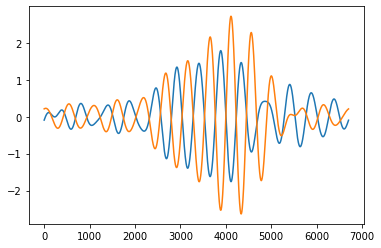

In [190]:
folder = "./final_0/"
folder = "./"

field_data_x = np.genfromtxt(folder + "Ex_2d_0.txt")
field_data_y = np.genfromtxt(folder + "Ey_2d_0.txt")
field_data_z = np.genfromtxt(folder + "Ez_2d_0.txt")

t = np.linspace(0, 25, field_data_y.shape[0])*field_data_y.shape[0]/32500.
ind1=17500
ind2=-1

sp_y = np.fft.fft(field_data_y[ind1:ind2])
sp_z = np.fft.fft(field_data_z[ind1:ind2])

length = t[ind1:ind2].shape[-1]
w = np.fft.fftfreq(length, d = t[1]-t[0])

plt.semilogy(w, abs(sp_y)/np.amax(abs(sp_y)))
plt.semilogy(w, abs(sp_z)/np.amax(abs(sp_z)))
plt.xlim(1, 30)
plt.ylim(1e-6, 1)
plt.show()

filter_center=3.1
filter_width=0.7
bandgap_filter_minus=np.exp(-(w-filter_center)**16/filter_width**16)
bandgap_filter_plus=np.exp(-(w+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
plt.semilogy(w, abs(sp_y)/np.amax(abs(sp_y)))
plt.semilogy(w, abs(bandgap_filter*sp_y)/np.amax(abs(sp_y)))
plt.semilogy(w, bandgap_filter)

sp_y_filt = bandgap_filter*sp_y
sp_z_filt = bandgap_filter*sp_z
plt.xlim(0,20)
plt.ylim(1e-9,1)
plt.show()

filtered_y=np.fft.ifft(sp_y_filt)
filtered_z=np.fft.ifft(sp_z_filt)

val = 6

plt.plot(filtered_y, filtered_z)
plt.xlim(-val, val)
plt.ylim(-val, val)
plt.show()


plt.plot(filtered_y)#[:1000])
plt.plot(filtered_z)#[:1000])
plt.show()